In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import product

from mvmm.multi_view.block_diag.graph.linalg import get_unnorm_laplacian_bp, get_sym_laplacian_bp
from mvmm.linalg_utils import svd_wrapper
from mvmm.viz_utils import simpleaxis


fig_dir = './figures/'
dpi = 200

In [2]:
def zero_row(n_vals=10):

    for epsilon in np.linspace(0, 1, n_vals):
        X = np.ones((4, 4))
        X[0, :] = epsilon
        yield X

    
    
def block_diag(n_vals=10):

    
    for epsilon in np.linspace(0, 1, n_vals):
        X = np.ones((4, 4))
        #X[0:2, 0:2] = epsilon
        # X[2:, 2:] = epsilon
        X[0:2, 2:] = epsilon
        X[2:, 0:2] = epsilon
        yield X

/Users/iaincarmichael/anaconda3/envs/mvmm_public/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]
/Users/iaincarmichael/anaconda3/envs/mvmm_public/lib/python3.6/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


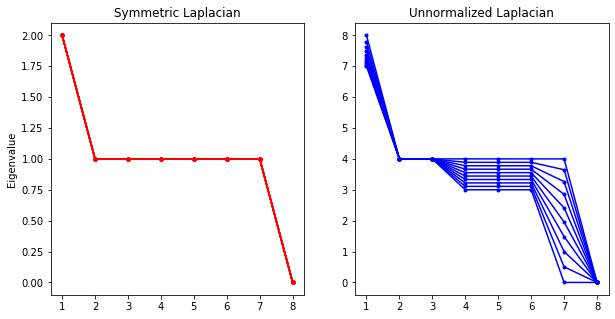

In [3]:
plt.figure(figsize=(10, 5))
for X in zero_row(10):

    L_un = get_unnorm_laplacian_bp(X)
    evals_un = svd_wrapper(L_un)[1]

    L_sym = get_sym_laplacian_bp(X)
    evals_sym = svd_wrapper(L_sym)[1]

    x_ticks = np.arange(len(evals_sym))
    
    
    plt.subplot(1, 2, 1)
    plt.plot(evals_sym, marker='.', label='Lsym', color='red')
    plt.title('Symmetric Laplacian')
    plt.ylabel('Eigenvalue')
    plt.xticks(x_ticks, x_ticks + 1)
    
    plt.subplot(1, 2, 2)
    plt.plot(evals_un, marker='.', label='Lun', color='blue')
    plt.title('Unnormalized Laplacian')
    plt.xticks(x_ticks, x_ticks + 1)


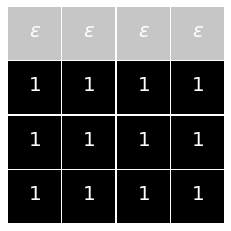

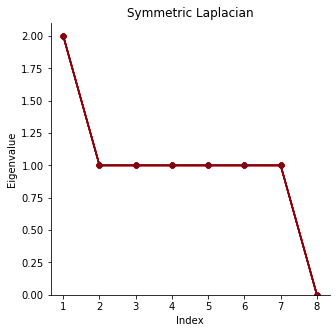

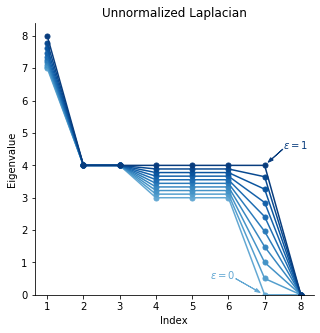

In [4]:
n_vals=10
ms = 10

plt.figure(figsize=(4, 4))
X = list(zero_row())[3]
sns.heatmap(X, cmap='Greys', vmin=0, vmax=1, cbar=False,square=True, linewidths=.5)
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)
for i, j in product(range(4), range(4)):
    if X[i, j] < 1:
        text = '$\epsilon$'
    else:
        text = '1'
    plt.text(j + .4, i + .55, text, color='white', fontsize=20)
plt.savefig(fig_dir + 'un_vs_sym__zero_row__mat.png', bbox_inches='tight', dpi=dpi)

plt.figure(figsize=(5, 5))
colors = sns.color_palette("Reds", 2*n_vals)[n_vals:]
for i, X in enumerate(zero_row(n_vals=n_vals)):

    L_sym = get_sym_laplacian_bp(X)
    evals_sym = svd_wrapper(L_sym)[1]
    
    plt.plot(evals_sym, marker='.', color=colors[i], ms=ms)
    
    
plt.title('Symmetric Laplacian')
plt.ylabel('Eigenvalue')
plt.xlabel('Index')
x_ticks = np.arange(len(evals_sym))
plt.xticks(x_ticks, x_ticks + 1)
plt.ylim(0)
simpleaxis(plt.gca())

plt.savefig(fig_dir + 'un_vs_sym__zero_row__sym_evals.png', bbox_inches='tight', dpi=dpi)


plt.figure(figsize=(5, 5))
colors = sns.color_palette("Blues", 2*n_vals)[n_vals:]
for i, X in enumerate(zero_row(n_vals=n_vals)):

    L_un = get_unnorm_laplacian_bp(X)
    evals_un = svd_wrapper(L_un)[1]
    plt.plot(evals_un, marker='.', color=colors[i], ms=ms)
    
    if i == 0:
        plt.text(x=4.5, y=.5, s='$\epsilon=0$', color=colors[i])
        plt.arrow(x=5.2, y=.5, dx=.55, dy=-.35, head_width=.1, color=colors[i])

    if i == n_vals-1:
        plt.text(x=6.5, y=4.5, s='$\epsilon=1$', color=colors[i])
        plt.arrow(x=6.5, y=4.5, dx=-.3, dy=-.3, head_width=.1, color=colors[i])

plt.title('Unnormalized Laplacian')
plt.ylabel('Eigenvalue')
plt.xlabel('Index')
x_ticks = np.arange(len(evals_un))
plt.xticks(x_ticks, x_ticks + 1)
plt.ylim(0)
simpleaxis(plt.gca())
plt.savefig(fig_dir + 'un_vs_sym__zero_row__un_evals.png', bbox_inches='tight', dpi=dpi)


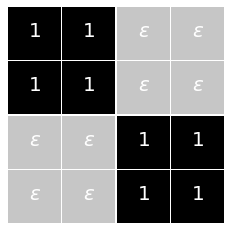

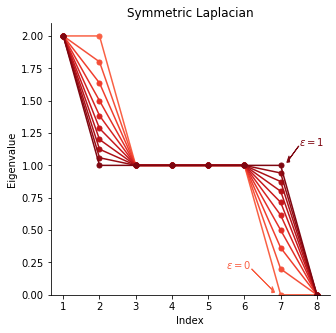

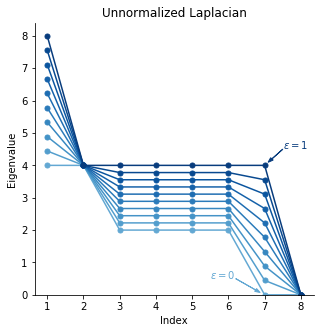

In [5]:
n_vals=10

plt.figure(figsize=(4, 4))
X = list(block_diag())[3]
sns.heatmap(X, cmap='Greys', vmin=0, vmax=1, cbar=False,square=True, linewidths=.5)
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)

for i, j in product(range(4), range(4)):
    if X[i, j] < 1:
        text = '$\epsilon$'
    else:
        text = '1'
    plt.text(j + .4, i + .55, text, color='white', fontsize=20)
    
plt.savefig(fig_dir + 'un_vs_sym__block_diag__mat.png', bbox_inches='tight', dpi=dpi)



plt.figure(figsize=(5, 5))
colors = sns.color_palette("Reds", 2*n_vals)[n_vals:]
for i, X in enumerate(block_diag(n_vals=n_vals)):

    L_sym = get_sym_laplacian_bp(X)
    evals_sym = svd_wrapper(L_sym)[1]
    
    plt.plot(evals_sym, marker='.', color=colors[i], ms=ms)
    
    if i == 0:
        plt.text(x=4.5, y=.2, s='$\epsilon=0$', color=colors[i])
        plt.arrow(x=5.2, y=.2, dx=.56, dy=-.16, head_width=.05, color=colors[i])

    if i == n_vals-1:
        plt.text(x=6.5, y=1.15, s='$\epsilon=1$', color=colors[i])
        plt.arrow(x=6.5, y=1.15, dx=-.26, dy=-.1, head_width=.05, color=colors[i])
    
    
    
plt.title('Symmetric Laplacian')
plt.ylabel('Eigenvalue')
plt.xlabel('Index')
x_ticks = np.arange(len(evals_sym))
plt.xticks(x_ticks, x_ticks + 1)
plt.ylim(0)
simpleaxis(plt.gca())
plt.savefig(fig_dir + 'un_vs_sym__block_diag__sym_evals.png', bbox_inches='tight', dpi=dpi)


plt.figure(figsize=(5, 5))
colors = sns.color_palette("Blues", 2*n_vals)[n_vals:]
for i, X in enumerate(block_diag(n_vals=n_vals)):

    L_un = get_unnorm_laplacian_bp(X)
    evals_un = svd_wrapper(L_un)[1]
    x_ticks = np.arange(len(evals_un))
    
    plt.plot(evals_un, marker='.', color=colors[i], ms=ms)
    
    if i == 0:
        plt.text(x=4.5, y=.5, s='$\epsilon=0$', color=colors[i])
        plt.arrow(x=5.2, y=.5, dx=.55, dy=-.35, head_width=.1, color=colors[i])

    if i == n_vals-1:
        plt.text(x=6.5, y=4.5, s='$\epsilon=1$', color=colors[i])
        plt.arrow(x=6.5, y=4.5, dx=-.3, dy=-.3, head_width=.1, color=colors[i])
    
plt.title('Unnormalized Laplacian')
plt.ylabel('Eigenvalue')
plt.xlabel('Index')
x_ticks = np.arange(len(evals_un))
plt.xticks(x_ticks, x_ticks + 1)
plt.ylim(0)
simpleaxis(plt.gca())

plt.savefig(fig_dir + 'un_vs_sym__block_diag__un_evals.png', bbox_inches='tight', dpi=dpi)
